In [1]:
using PETLION, Plots

In [2]:
p = petlion(LCO;
    jacobian=:symbolic,
    );

# Parameters

All parameters are stored as Float64 in the dict `p.θ`. The dict can be updated at any time to change the value of each parameter or to add a new parameter.

Since all functions are completely parameterized, the paramter values can be updated without additional compilation costs.

In [3]:
for key in keys(sort(p.θ))
    println("$key: $(p.θ[key])")
end

Cp_a: 897.0
Cp_n: 700.0
Cp_p: 700.0
Cp_s: 700.0
Cp_z: 385.0
D_n: 7.5e-10
D_p: 7.5e-10
D_s: 7.5e-10
D_sn: 3.9e-14
D_sp: 1.0e-14
Ea_D_sn: 5000.0
Ea_D_sp: 5000.0
Ea_k_n: 5000.0
Ea_k_p: 5000.0
I1C: 29.230007240358237
M_n: 0.00073
R_SEI: 0.01
Rp_n: 2.0e-6
Rp_p: 2.0e-6
T_amb: 298.15
T₀: 298.15
Uref_s: 0.4
brugg_n: 4.0
brugg_p: 4.0
brugg_s: 4.0
c_e₀: 1000.0
c_max_n: 30555.0
c_max_p: 51554.0
h_cell: 1.0
i_0_jside: 1.5e-6
k_n: 5.031e-11
k_n_aging: 1.0
k_p: 2.334e-11
l_a: 1.0e-5
l_n: 8.8e-5
l_p: 8.0e-5
l_s: 2.5e-5
l_z: 1.0e-5
t₊: 0.364
w: 2.0
θ_max_n: 0.8551
θ_max_p: 0.4955
θ_min_n: 0.01429
θ_min_p: 0.99174
λ_MHC_n: 6.26e-20
λ_MHC_p: 6.26e-20
λ_a: 237.0
λ_n: 1.7
λ_p: 2.1
λ_s: 0.16
λ_z: 401.0
ρ_a: 2700.0
ρ_n: 2500.0
ρ_p: 2500.0
ρ_s: 1100.0
ρ_z: 8940.0
σ_a: 3.55e7
σ_n: 100.0
σ_p: 100.0
σ_z: 5.96e7
ϵ_fn: 0.0326
ϵ_fp: 0.025
ϵ_n: 0.485
ϵ_p: 0.385
ϵ_s: 0.724


# Example: Cathode porosity

After the initial compilation, everything runs smoothly

 31.338892 seconds (154.18 M allocations: 6.975 GiB, 3.70% gc time, 99.98% compilation time)
  0.007334 seconds (4.32 k allocations: 1022.102 KiB, 59.17% compilation time)
  0.002378 seconds (1.34 k allocations: 875.367 KiB)


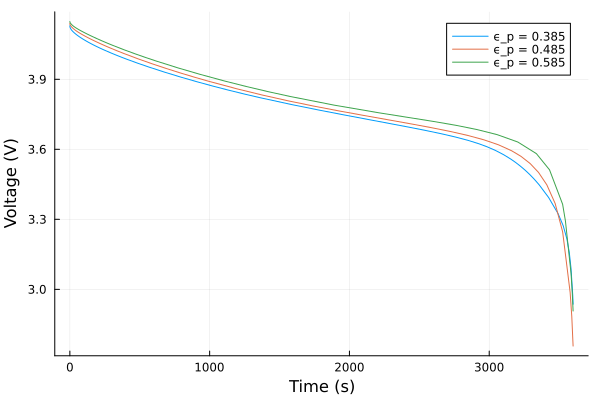

In [4]:
p.opts.SOC = 1

p.θ[:ϵ_p] = 0.385
@time sol1 = simulate(p,I=-1)

p.θ[:ϵ_p] = 0.485
@time sol2 = simulate(p,I=-1)

p.θ[:ϵ_p] = 0.585
@time sol3 = simulate(p,I=-1)

plot(sol1.t, sol1.V;  label="ϵ_p = 0.385", xlabel="Time (s)", ylabel="Voltage (V)", legend=:topright)
plot!(sol2.t, sol2.V; label="ϵ_p = 0.485")
plot!(sol3.t, sol3.V; label="ϵ_p = 0.585")